In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.shape

(1000, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [8]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [9]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [10]:
df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [11]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

**We explore that:**
- we have almost the same count of people belonging to each gender
- most students are from group C and the smallest amount of people are from group A
- only 59 students have the highest parental educational level (master's degree)
- the number of students who have a standard lunch is twice as many as the rest
- situation with test preparation course is the same with as lunches

In [12]:
df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [13]:
df.groupby(['gender', 'race/ethnicity']).mean()

math score  reading score  writing score
gender race/ethnicity                                          
female group A          58.527778      69.000000      67.861111
       group B          61.403846      71.076923      70.048077
       group C          62.033333      71.944444      71.777778
       group D          65.248062      74.046512      75.023256
       group E          70.811594      75.840580      75.536232
male   group A          63.735849      61.735849      59.150943
       group B          65.930233      62.848837      60.220930
       group C          67.611511      65.424460      62.712230
       group D          69.413534      66.135338      65.413534
       group E          76.746479      70.295775      67.394366

In [14]:
df.groupby(['gender', 'race/ethnicity', 'test preparation course']).mean()

math score  reading score  \
gender race/ethnicity test preparation course                              
female group A        completed                 67.750000      77.000000   
                      none                      53.916667      65.000000   
       group B        completed                 62.628571      74.514286   
                      none                      60.782609      69.333333   
       group C        completed                 66.101449      77.304348   
                      none                      59.504505      68.612613   
       group D        completed                 67.727273      77.340909   
                      none                      63.964706      72.341176   
       group E        completed                 75.750000      82.000000   
                      none                      68.177778      72.555556   
male   group A        completed                 68.578947      67.263158   
                      none                      61.029412      58.647059   
       group B        completed                 72.030303      71.090909   
                      none                      62.132075      57.716981   
       group C        completed                 69.500000      68.416667   
                      none                      66.615385      63.846154   
       group D        completed                 72.184211      70.447368   
                      none                      68.305263      64.410526   
       group E        completed                 78.555556      73.111111   
                      none                      74.885714      67.400000   

                                               writing score  
gender race/ethnicity test preparation course                 
female group A        completed                    76.583333  
                      none                         63.500000  
       group B        completed                    74.485714  
                      none                         67.797101  
       group C        completed                    78.840580  
                      none                         67.387387  
       group D        completed                    80.454545  
                      none                         72.211765  
       group E        completed                    83.000000  
                      none                         71.555556  
male   group A        completed                    67.315789  
                      none                         54.588235  
       group B        completed                    69.121212  
                      none                         54.679245  
       group C        completed                    68.145833  
                      none                         59.846154  
       group D        completed                    72.263158  
                      none                         62.673684  
       group E        completed                    71.305556  
                      none                         63.371429

In [15]:
df.groupby(['gender', 'lunch']).mean()

math score  reading score  writing score
gender lunch                                                 
female free/reduced   55.814815      67.386243      66.444444
       standard       68.124620      75.607903      75.927052
male   free/reduced   62.457831      61.542169      59.126506
       standard       72.022152      67.537975      65.509494

In [16]:
df.groupby(['parental level of education']).mean().sort_values(by='math score', ascending = False)

,math score,reading score,writing score
parental level of education,,,
master's degree,69.745763,75.372881,75.677966
bachelor's degree,69.389831,73.000000,73.381356
associate's degree,67.882883,70.927928,69.896396
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268
high school,62.137755,64.704082,62.448980


In [17]:
plt.rcParams['figure.figsize'] = (15, 10)

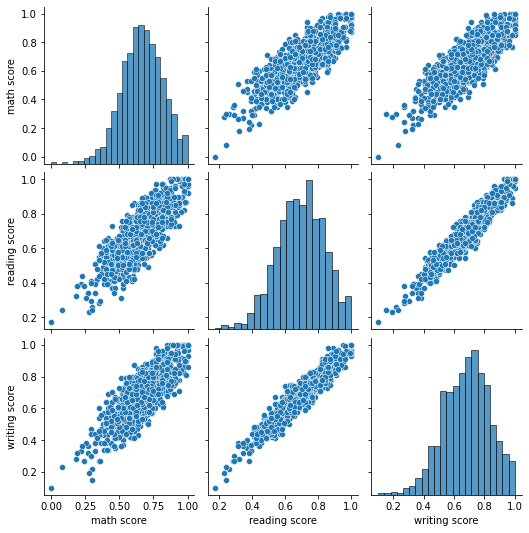

In [96]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])

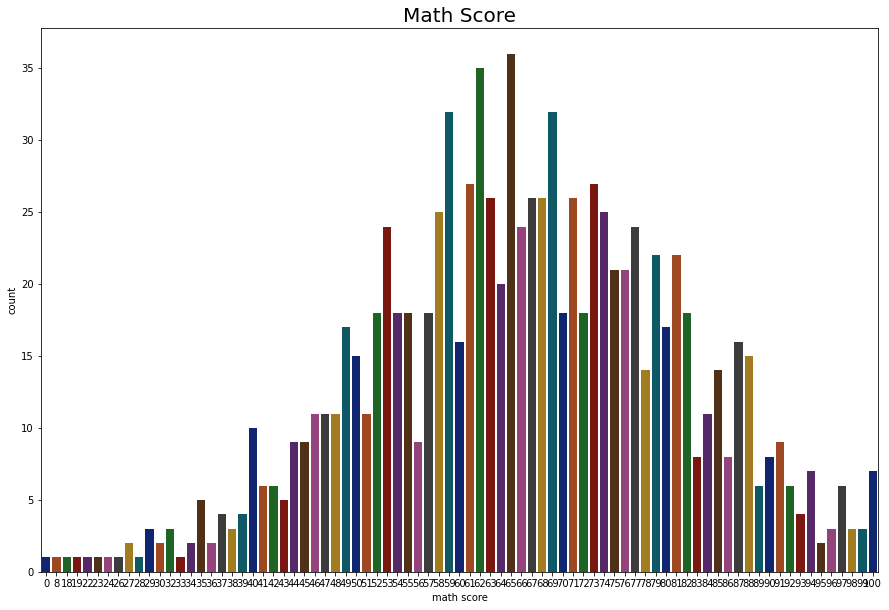

In [19]:
sns.countplot(x=df['math score'], palette = 'dark')
plt.title('Math Score',fontsize = 20)
plt.show()

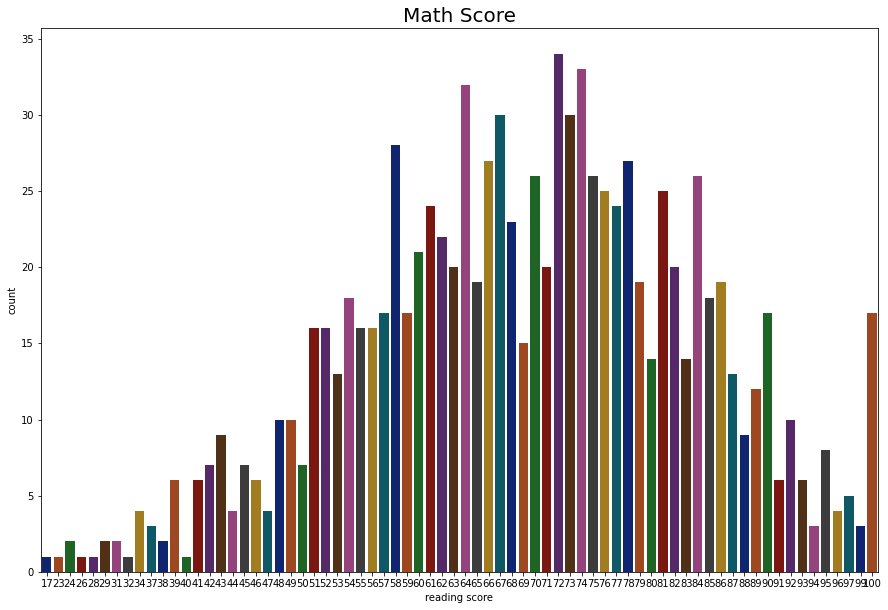

In [20]:
sns.countplot(x=df['reading score'], palette = 'dark')
plt.title('Math Score',fontsize = 20)
plt.show()

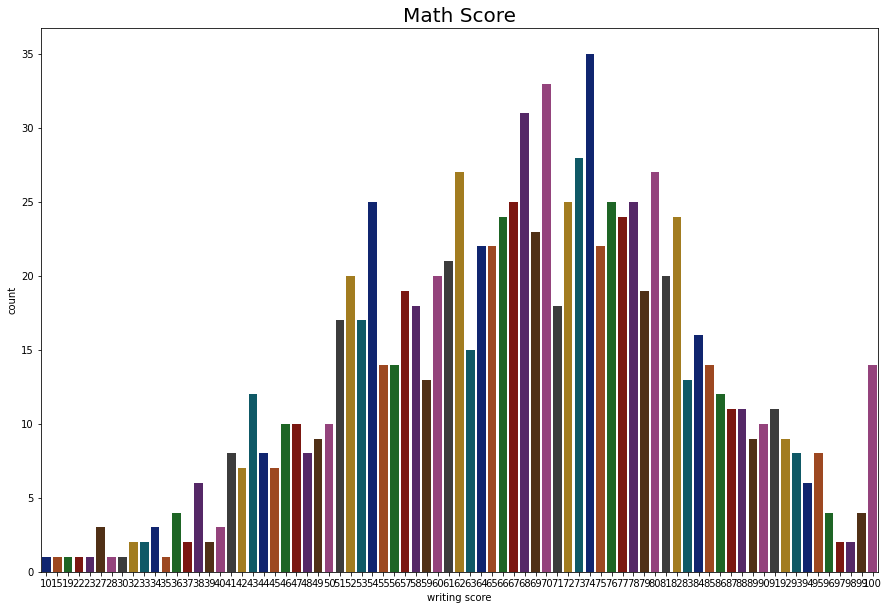

In [21]:
sns.countplot(x=df['writing score'], palette = 'dark')
plt.title('Math Score',fontsize = 20)
plt.show()

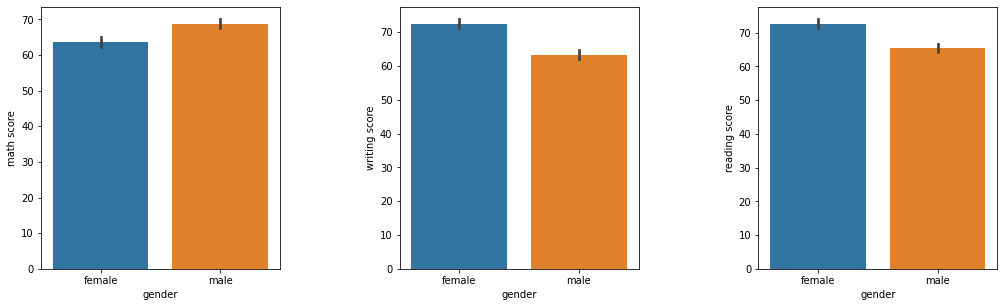

In [22]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
sns.barplot(x='gender', y='math score', data=df)

plt.subplot(252)
sns.barplot(x='gender', y='writing score', data=df)

plt.subplot(253)
sns.barplot(x='gender', y='reading score', data=df)

plt.show()

In [24]:
def class_grade(scores):
    if scores >= 90 and scores <= 100:
        return 5
    elif scores >= 75 and scores < 90:
        return 4
    elif scores >= 60 and scores < 75:
        return 3
    elif scores >= 0 and scores < 60:
        return 2

In [25]:
df['mean score'] = (df['math score']+df['reading score']+df['writing score'])/3

In [26]:
df['grade'] = df['mean score'].apply(class_grade)

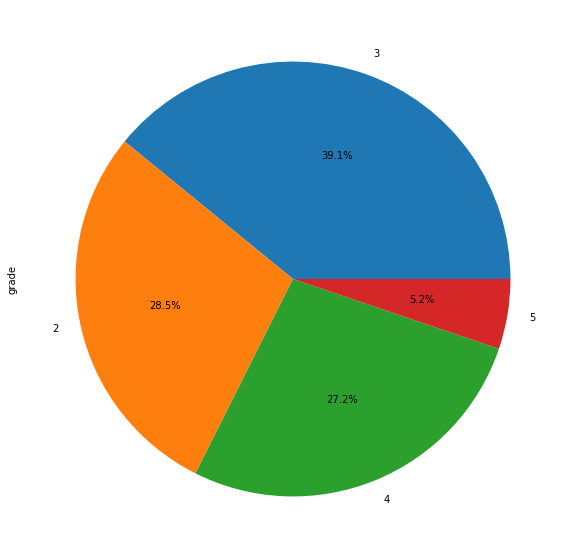

In [27]:
df['grade'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

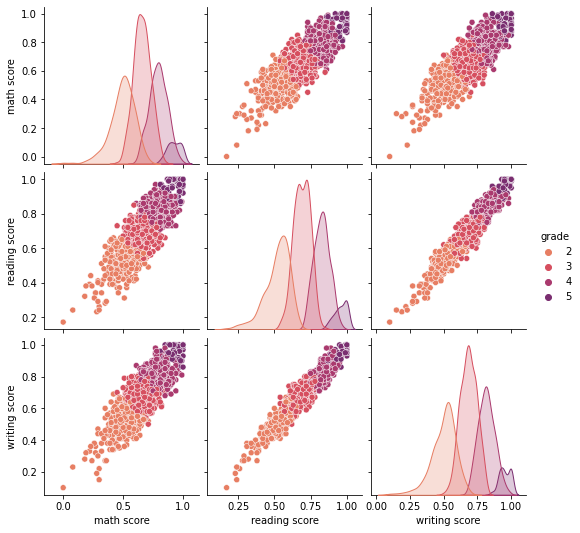

In [98]:
sns.pairplot(df[['math score', 'reading score', 'writing score', 'grade']], 
             hue='grade', palette=sns.color_palette('flare', 4))

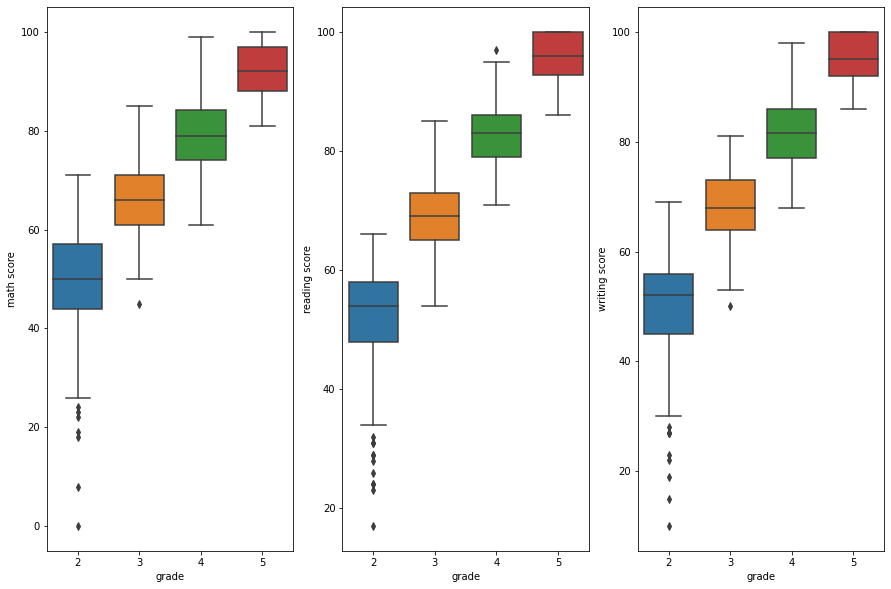

In [28]:
plt.subplot(131)
sns.boxplot(x='grade', y='math score', data=df)

plt.subplot(132)
sns.boxplot(x='grade', y='reading score', data=df)

plt.subplot(133)
sns.boxplot(x='grade', y='writing score', data=df)

plt.show()

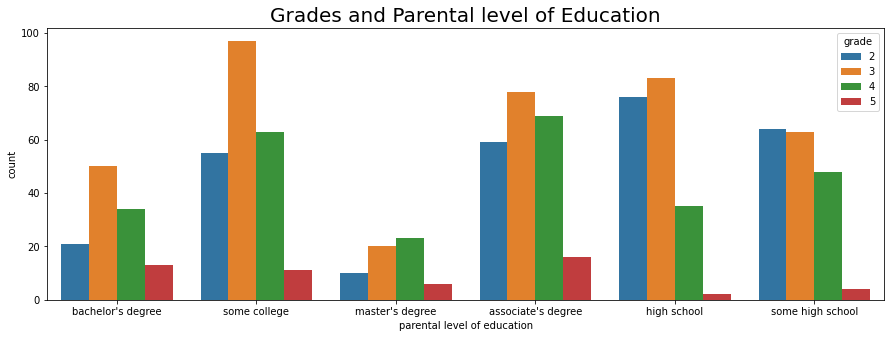

In [29]:
plt.figure(figsize=(15,5))
plt.title('Grades and Parental level of Education',fontsize=20)
sns.countplot(x="parental level of education", hue="grade", data=df)
plt.show()

**Conclusion:**
- male students have better results in math but female have higher results in writing and reading
- also students that have standard lunch have better grades
- parental education has impact on students' scores. Students of educated families are more successful 
- of course that students who completed the test preparation course performed better on exams 
- and maybe the smartest students are from ethnical group E

In [30]:
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'female' else 1)
df['test preparation course'] = df['test preparation course'].apply(lambda x: 0 if x == 'none' else 1)
df['lunch'] = df['lunch'].apply(lambda x: 0 if x == 'free/reduced' else 1)

In [31]:
race_column = {'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}
parental_level_of_education_column = {'high school': 0, 'some high school': 1, 'some college': 2, "associate's degree": 3, 
                                      "bachelor's degree": 4, "master's degree": 5}
df['race/ethnicity'] = df['race/ethnicity'].map(race_column)

In [32]:
df['parental level of education'] = df['parental level of education'].map(parental_level_of_education_column)

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,grade
0,0,1,4,1,0,72,72,74,72.666667,3
1,0,2,2,1,1,69,90,88,82.333333,4
2,0,1,5,1,0,90,95,93,92.666667,5
3,1,0,3,0,0,47,57,44,49.333333,2
4,1,2,2,1,0,76,78,75,76.333333,4


In [34]:
df['math score'] = df['math score']/100
df['reading score'] = df['reading score']/100
df['writing score'] = df['writing score']/100

<AxesSubplot:>

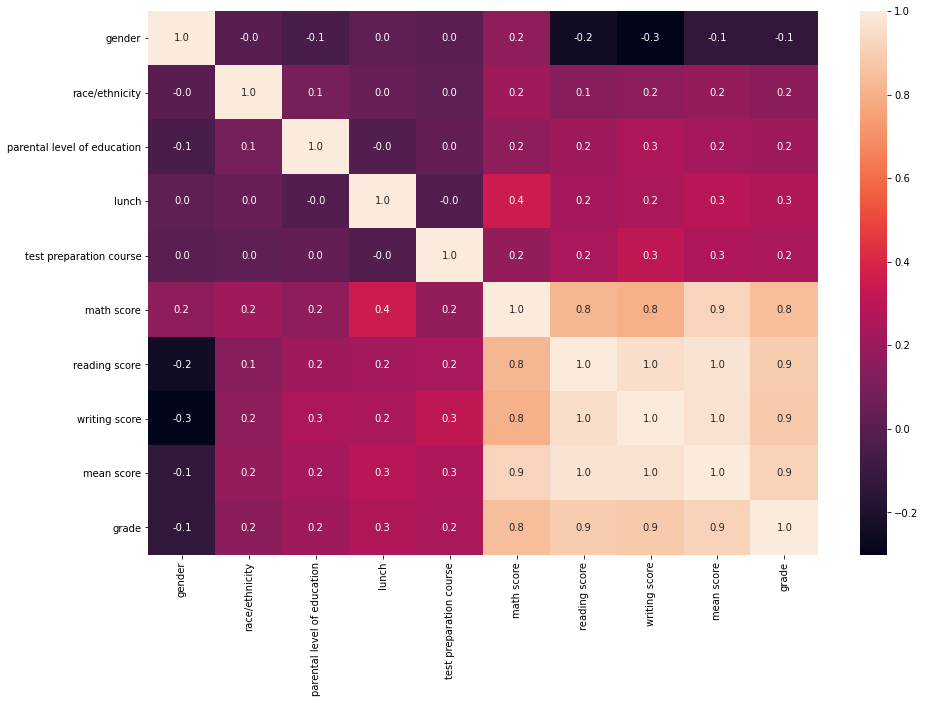

In [35]:
sns.heatmap(df.corr(), annot = True, fmt = '.1f')

In [36]:
X = df.drop(['mean score', 'grade'], 1)
y = df['grade']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train) 
X_test_sc = scaler.transform(X_test)

# k-NN

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn_grid = {'n_neighbors' : [1, 5, 7, 10, 13, 14, 15, 20]}
knn_searcher = GridSearchCV(knn, knn_grid, n_jobs=-1)
knn_searcher.fit(X_train_sc, y_train)
knn_model = knn_searcher.best_estimator_

In [42]:
print('Best parameters:', knn_model.get_params())

Best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [43]:
knn_model.score(X_test_sc, y_test)

0.8366666666666667

In [44]:
cross_val_score(knn_model, X, y, cv=5).mean()

0.6289999999999999

In [45]:
knn_pred = knn_model.predict(X_test_sc)

In [121]:
knn_report = metrics.classification_report(y_test, knn_pred, 
                                    target_names=['grade 2', 'grade 3', 'grade 4', 'grade 5'])
print(knn_report)

              precision    recall  f1-score   support

     grade 2       0.91      0.90      0.91        81
     grade 3       0.77      0.90      0.83       121
     grade 4       0.86      0.72      0.78        86
     grade 5       1.00      0.58      0.74        12

    accuracy                           0.84       300
   macro avg       0.89      0.78      0.82       300
weighted avg       0.85      0.84      0.83       300



<AxesSubplot:>

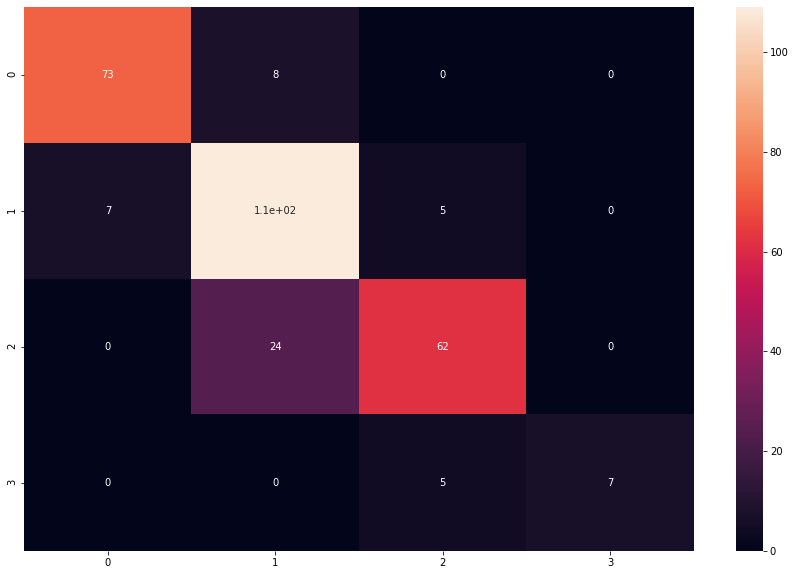

In [47]:
cf_matrix_knn = metrics.confusion_matrix(y_test, knn_pred)
sns.heatmap(cf_matrix_knn, annot=True)

# Decision tree

In [48]:
tree = DecisionTreeClassifier()

In [49]:
tree_grid = {'criterion': ['gini', 'entropy'], 
                 'max_depth': [2, 3, 4, 5, 10, 12, 15]}
tree_searcher = GridSearchCV(tree, tree_grid, n_jobs=4)
tree_searcher.fit(X_train_sc, y_train)
tree_model = tree_searcher.best_estimator_

In [51]:
print('Best parameters:', tree_model.get_params())

Best parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [52]:
tree_model.score(X_test_sc, y_test)

0.9566666666666667

In [53]:
cross_val_score(tree_model, X, y, cv=5).mean()

0.9349999999999999

In [54]:
tree_pred = tree_model.predict(X_test_sc)

In [120]:
tree_report = metrics.classification_report(y_test, tree_pred, 
                                    target_names=['grade 2', 'grade 3', 'grade 4', 'grade 5'])
print(tree_report)

              precision    recall  f1-score   support

     grade 2       0.99      0.98      0.98        81
     grade 3       0.95      0.98      0.96       121
     grade 4       0.97      0.91      0.94        86
     grade 5       0.75      1.00      0.86        12

    accuracy                           0.96       300
   macro avg       0.92      0.96      0.94       300
weighted avg       0.96      0.96      0.96       300



<AxesSubplot:>

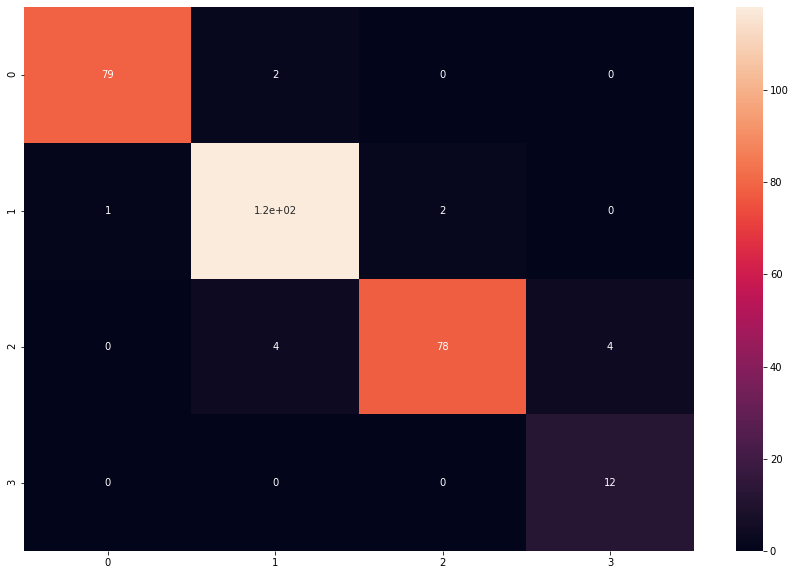

In [56]:
cf_matrix_tree = metrics.confusion_matrix(y_test, tree_pred)
sns.heatmap(cf_matrix_tree, annot=True)

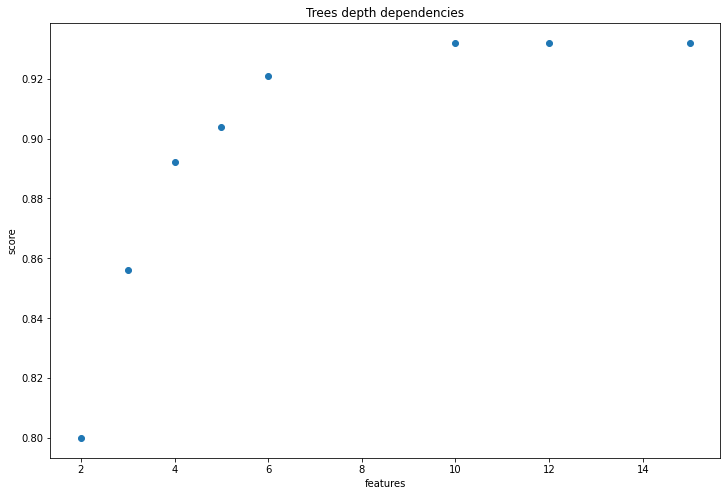

In [57]:
def plot_rf_tree_depth():
    d = X.shape[1]
    depth = [2, 3, 4, 5, 6, 10, 12, 15]
    results = []
    for d in depth:
        clf = DecisionTreeClassifier(random_state=1, max_depth=d, criterion='gini')
        results.append(cross_val_score(clf, X, y, cv=5).mean())
    plt.figure(figsize=(12, 8))
    plt.plot(depth, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees depth dependencies")
    plt.show()
plot_rf_tree_depth()

In [58]:
feature_list = list(X.columns)

In [99]:
feature_list

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [59]:
importances_tree = list(tree_model.feature_importances_)
feature_importances_tree = [(feature, importance) for feature, importance in zip(feature_list, importances_tree)]
print(feature_importances_tree)

[('gender', 0.0033007661994459408), ('race/ethnicity', 0.0023740268683775452), ('parental level of education', 0.007658474562059007), ('lunch', 0.007999647981317004), ('test preparation course', 0.0021955281170797075), ('math score', 0.2197528286342066), ('reading score', 0.597155030944046), ('writing score', 0.15956369669346823)]


In [102]:
tree_model_plot = DecisionTreeClassifier(max_depth=3)
tree_model_plot.fit(X_train_sc, y_train)
tree_model_plot.score(X_test_sc, y_test)

0.87

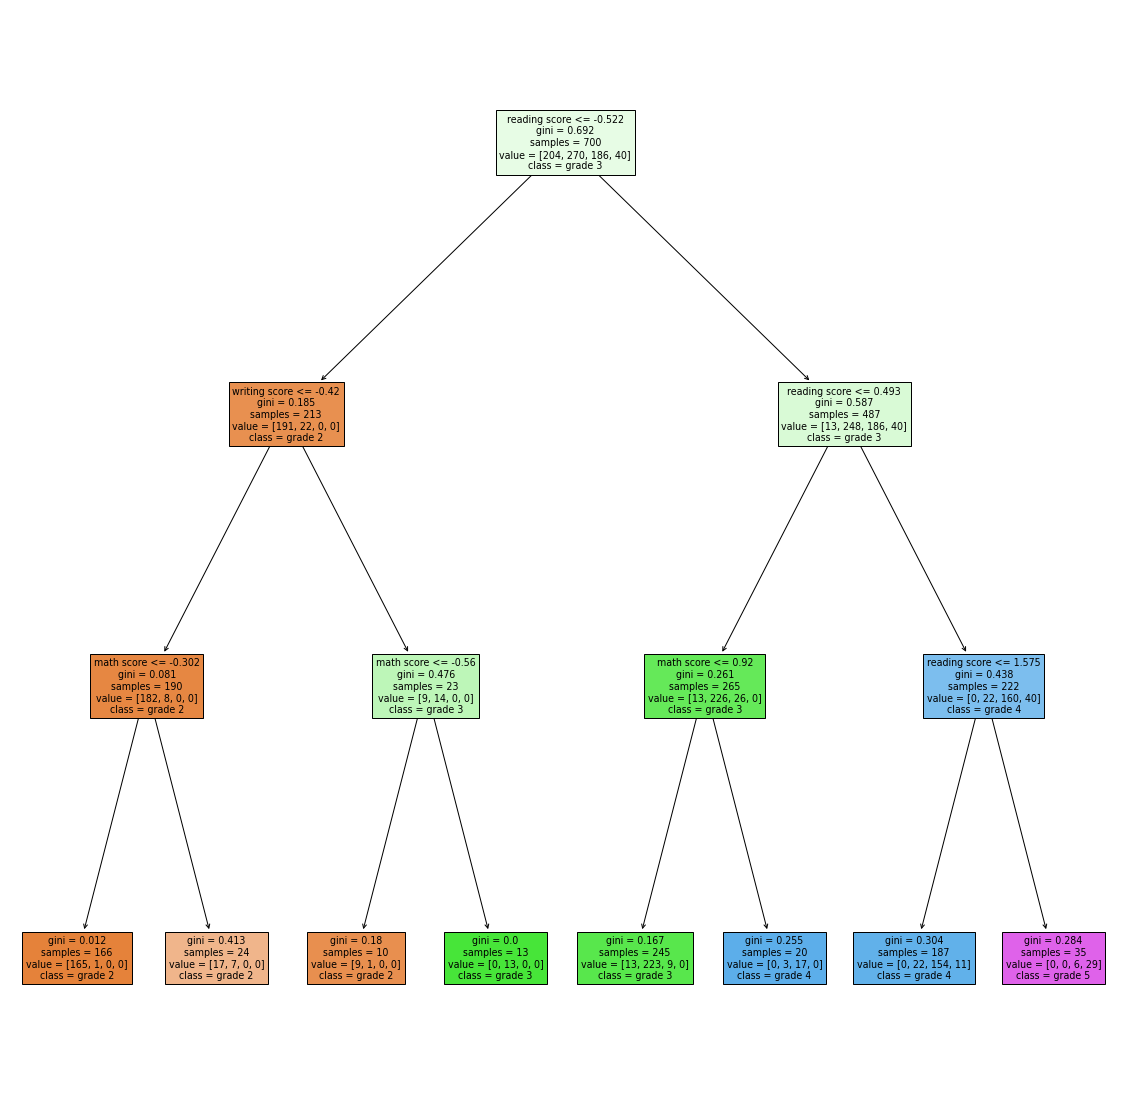

In [103]:
plt.figure(figsize = (20, 20))
plot_tree(tree_model_plot, feature_names = feature_list, class_names = ['grade 2', 'grade 3', 'grade 4', 'grade 5'], filled = True)
plt.show()

In [104]:
print(export_text(tree_model_plot, feature_names=feature_list, show_weights=True))

|--- reading score <= -0.52
|   |--- writing score <= -0.42
|   |   |--- math score <= -0.30
|   |   |   |--- weights: [165.00, 1.00, 0.00, 0.00] class: 2
|   |   |--- math score >  -0.30
|   |   |   |--- weights: [17.00, 7.00, 0.00, 0.00] class: 2
|   |--- writing score >  -0.42
|   |   |--- math score <= -0.56
|   |   |   |--- weights: [9.00, 1.00, 0.00, 0.00] class: 2
|   |   |--- math score >  -0.56
|   |   |   |--- weights: [0.00, 13.00, 0.00, 0.00] class: 3
|--- reading score >  -0.52
|   |--- reading score <= 0.49
|   |   |--- math score <= 0.92
|   |   |   |--- weights: [13.00, 223.00, 9.00, 0.00] class: 3
|   |   |--- math score >  0.92
|   |   |   |--- weights: [0.00, 3.00, 17.00, 0.00] class: 4
|   |--- reading score >  0.49
|   |   |--- reading score <= 1.58
|   |   |   |--- weights: [0.00, 22.00, 154.00, 11.00] class: 4
|   |   |--- reading score >  1.58
|   |   |   |--- weights: [0.00, 0.00, 6.00, 29.00] class: 5



# Random forest

In [61]:
forest = RandomForestClassifier()

In [62]:
%%time
forest_grid = {'n_estimators': [150, 200, 300, 400, 600, 800],
                 'max_depth': [4, 5, 10, 12], 
                 'criterion': ['gini', 'entropy']}
forest_searcher = GridSearchCV(forest, forest_grid, n_jobs=4)
forest_searcher.fit(X_train_sc, y_train)
forest_model = forest_searcher.best_estimator_

Wall time: 1min 19s


In [63]:
print('best parameters:', forest_model.get_params())

best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [64]:
cross_val_score(forest_model, X, y, cv=5).mean()

0.954

In [65]:
forest_pred = forest_model.predict(X_test_sc)

In [119]:
forest_report = metrics.classification_report(y_test, forest_pred, 
                                    target_names=['grade 2', 'grade 3', 'grade 4', 'grade 5'])
print(forest_report)

              precision    recall  f1-score   support

     grade 2       0.98      0.99      0.98        81
     grade 3       0.94      0.98      0.96       121
     grade 4       0.99      0.92      0.95        86
     grade 5       1.00      1.00      1.00        12

    accuracy                           0.96       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.96      0.96      0.96       300



<AxesSubplot:>

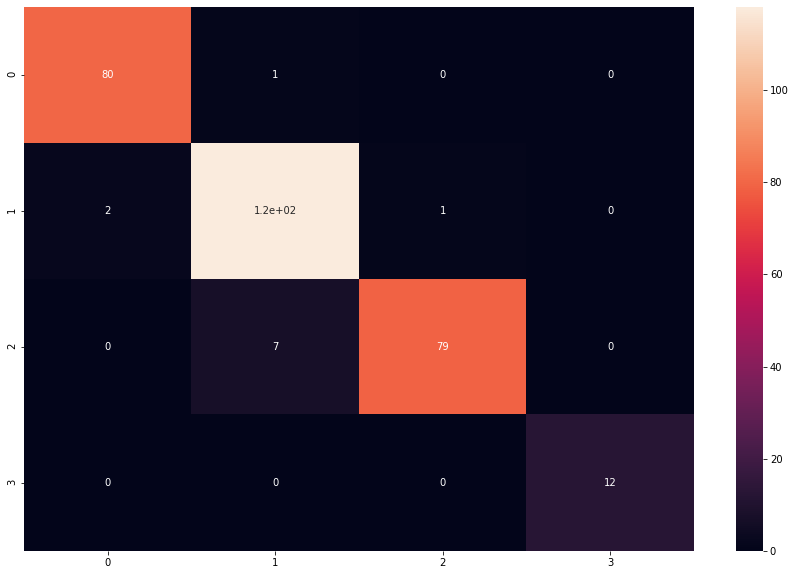

In [67]:
cf_matrix_forest = metrics.confusion_matrix(y_test, forest_pred)
sns.heatmap(cf_matrix_forest, annot=True)

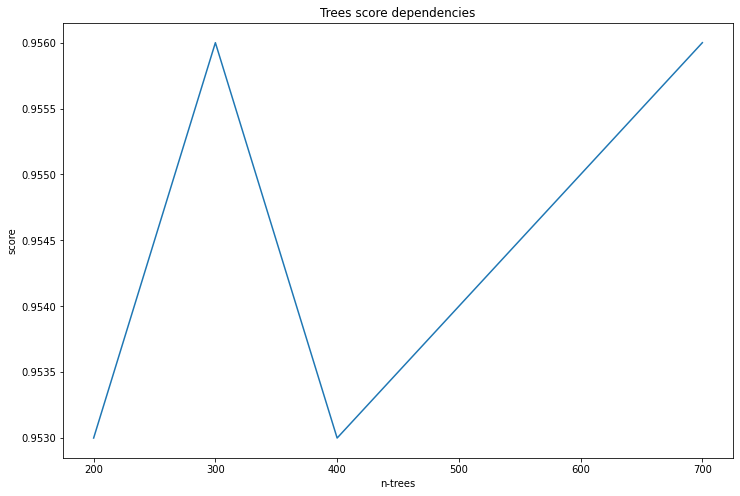

In [68]:
def plot_rf_trees_score():
    trees = [200, 300, 400, 700]
    results = []
    for tree in trees:
        clf = RandomForestClassifier(n_estimators=tree, random_state=1, max_depth=10, criterion='entropy')
        results.append(cross_val_score(clf, X, y, cv=5).mean())
    plt.figure(figsize=(12, 8))
    plt.plot(trees, results)
    plt.xlabel("n-trees")
    plt.ylabel("score")
    plt.title("Trees score dependencies")
    plt.show()
plot_rf_trees_score()

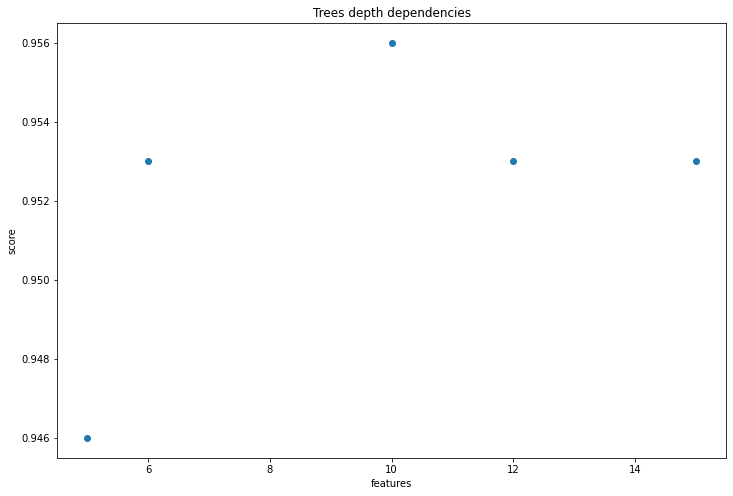

In [69]:
def plot_rf_tree_depth():
    d = X.shape[1]
    depth = [5, 6, 10, 12, 15]
    results = []
    for d in depth:
        clf = RandomForestClassifier(random_state=1, max_depth=d, criterion='entropy', n_estimators=300)
        results.append(cross_val_score(clf, X, y, cv=5).mean())
    plt.figure(figsize=(12, 8))
    plt.plot(depth, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees depth dependencies")
    plt.show()
plot_rf_tree_depth()

In [70]:
importances_forest = list(forest_model.feature_importances_)
feature_importances_forest = [(feature, importance) for feature, importance in zip(feature_list, importances_forest)]
print(feature_importances_forest)

[('gender', 0.019079943475664954), ('race/ethnicity', 0.022313634898981385), ('parental level of education', 0.024848124026687634), ('lunch', 0.014286789365725664), ('test preparation course', 0.01500498512610075), ('math score', 0.2574617480346131), ('reading score', 0.3514101322831679), ('writing score', 0.2955946427890585)]


# AdaBoostClassifier

In [71]:
ada_boost = AdaBoostClassifier()

In [72]:
%%time
ada_boost_grid = {'n_estimators': [50, 100, 150, 200, 300, 400],
                 'learning_rate': [0.7, 0.8, 0.9, 1], 
                 'base_estimator': [tree_model, forest_model]}
ada_boost_searcher = GridSearchCV(ada_boost, ada_boost_grid, n_jobs=4)
ada_boost_searcher.fit(X_train_sc, y_train)
ada_boost_model = ada_boost_searcher.best_estimator_

Wall time: 39 s


In [73]:
print('best parameters:', ada_boost_model.get_params())

best parameters: {'algorithm': 'SAMME.R', 'base_estimator__bootstrap': True, 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 10, 'base_estimator__max_features': 'auto', 'base_estimator__max_leaf_nodes': None, 'base_estimator__max_samples': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__n_estimators': 300, 'base_estimator__n_jobs': None, 'base_estimator__oob_score': False, 'base_estimator__random_state': None, 'base_estimator__verbose': 0, 'base_estimator__warm_start': False, 'base_estimator': RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300), 'learning_rate': 0.7, 'n_estimators': 400, 'random_state': None}


In [74]:
cross_val_score(ada_boost_model, X, y, cv=5).mean()

0.9550000000000001

In [75]:
ada_boost_pred = ada_boost_model.predict(X_test_sc)

In [118]:
ada_boost_report = metrics.classification_report(y_test, ada_boost_pred, 
                                    target_names=['grade 2', 'grade 3', 'grade 4', 'grade 5'])
print(ada_boost_report)

              precision    recall  f1-score   support

     grade 2       0.98      0.99      0.98        81
     grade 3       0.94      0.98      0.96       121
     grade 4       0.99      0.92      0.95        86
     grade 5       1.00      1.00      1.00        12

    accuracy                           0.96       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.96      0.96      0.96       300



<AxesSubplot:>

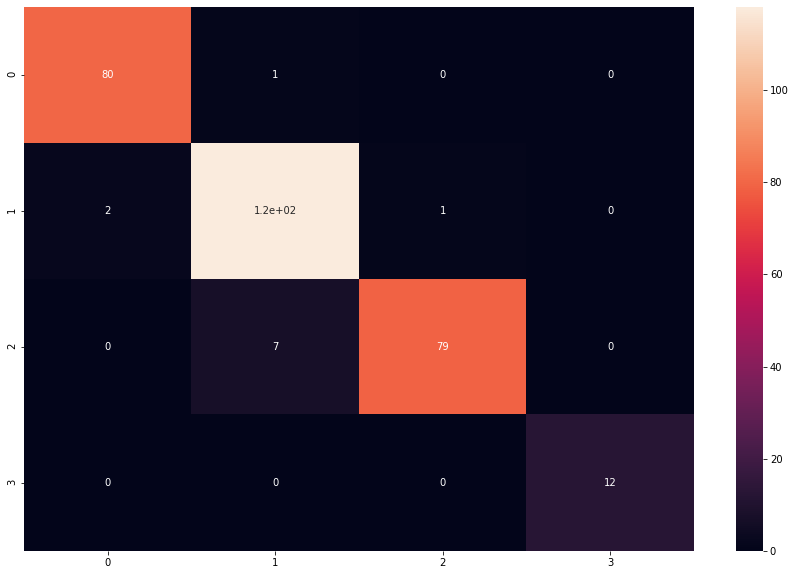

In [77]:
cf_matrix_ada_boost = metrics.confusion_matrix(y_test, ada_boost_pred)
sns.heatmap(cf_matrix_ada_boost, annot=True)

# SVM

In [78]:
svm = SVC()

In [79]:
%%time
svm_grid = {'C': [1, 2, 3, 5, 7],
           'gamma': ['auto', 'scale'],
           'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
           'degree': [1, 2, 3, 4, 5]}
svm_searcher = GridSearchCV(svm, svm_grid, n_jobs=4)
svm_searcher.fit(X_train_sc, y_train)
svm_model = svm_searcher.best_estimator_

Wall time: 4.47 s


In [80]:
print('best parameters:', svm_model.get_params())

best parameters: {'C': 3, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [81]:
cross_val_score(svm_model, X, y, cv=10).mean()

0.9639999999999999

In [82]:
svm_pred = svm_model.predict(X_test_sc)

In [117]:
svm_report = metrics.classification_report(y_test, svm_pred, 
                                    target_names=['grade 2', 'grade 3', 'grade 4', 'grade 5'])
print(svm_report)

              precision    recall  f1-score   support

     grade 2       0.98      1.00      0.99        81
     grade 3       0.98      0.98      0.98       121
     grade 4       1.00      0.97      0.98        86
     grade 5       0.92      1.00      0.96        12

    accuracy                           0.98       300
   macro avg       0.97      0.99      0.98       300
weighted avg       0.98      0.98      0.98       300



<AxesSubplot:>

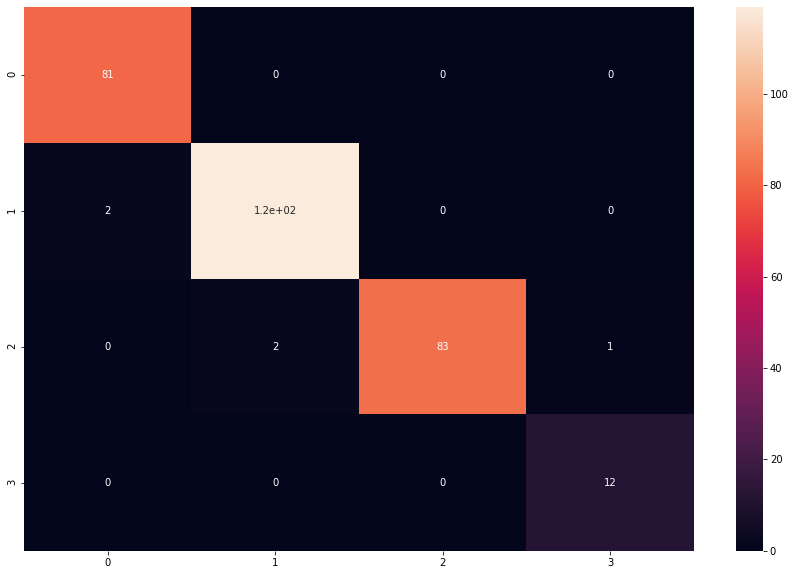

In [84]:
cf_matrix_svm = metrics.confusion_matrix(y_test, svm_pred)
sns.heatmap(cf_matrix_svm, annot=True)

# All results

In [123]:
print('KNN\n', knn_report, '\n')
print('TREE\n', tree_report, '\n')
print('RANDOM FOREST\n', forest_report, '\n')
print('ADABOOST\n', ada_boost_report, '\n')
print('SVM\n', svm_report, '\n')

KNN
               precision    recall  f1-score   support

     grade 2       0.91      0.90      0.91        81
     grade 3       0.77      0.90      0.83       121
     grade 4       0.86      0.72      0.78        86
     grade 5       1.00      0.58      0.74        12

    accuracy                           0.84       300
   macro avg       0.89      0.78      0.82       300
weighted avg       0.85      0.84      0.83       300
 

TREE
               precision    recall  f1-score   support

     grade 2       0.99      0.98      0.98        81
     grade 3       0.95      0.98      0.96       121
     grade 4       0.97      0.91      0.94        86
     grade 5       0.75      1.00      0.86        12

    accuracy                           0.96       300
   macro avg       0.92      0.96      0.94       300
weighted avg       0.96      0.96      0.96       300
 

RANDOM FOREST
               precision    recall  f1-score   support

     grade 2       0.98      0.99      0.98  

So, as we can see SVM is the best model for our data. And the worst is KNN.